# Importing libraries 

In [1]:
# Add required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
# Ordinal encoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

#from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

import optuna
seed =42 # for repeatability
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Getting Data

In [2]:
# Load data set
# Add path for the data set
path = 'D:/ML/bank/bank_full.csv'
df = pd.read_csv(path, delimiter=';') # Use delimiter to split the csv file
Y = df['y']
df = df.drop(['y'],axis=1)
Data = df;

# Understanding the data

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown


In [4]:
df.shape

(45211, 16)

# Data cleaning

In [5]:
 df.isnull().sum() # Check the missing elements

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

# Data analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


Numerical features: 7\
Age, balance, day, duration, campaign, pdays, previous\
Categorical features: 9\
Job, Marital, education, default, housing, loan, contact, month, poutcome

In [7]:
# checking for duplicate rows
print(df.shape[0])
print(f'Number of duplicated rows: {df.shape[0] - df.drop_duplicates().shape[0]}')
print('dropping duplicates')
df = df.drop_duplicates()

45211
Number of duplicated rows: 0
dropping duplicates


In [8]:
df.nunique() # Count Distinct Values

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
dtype: int64

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Visualizing numerical features

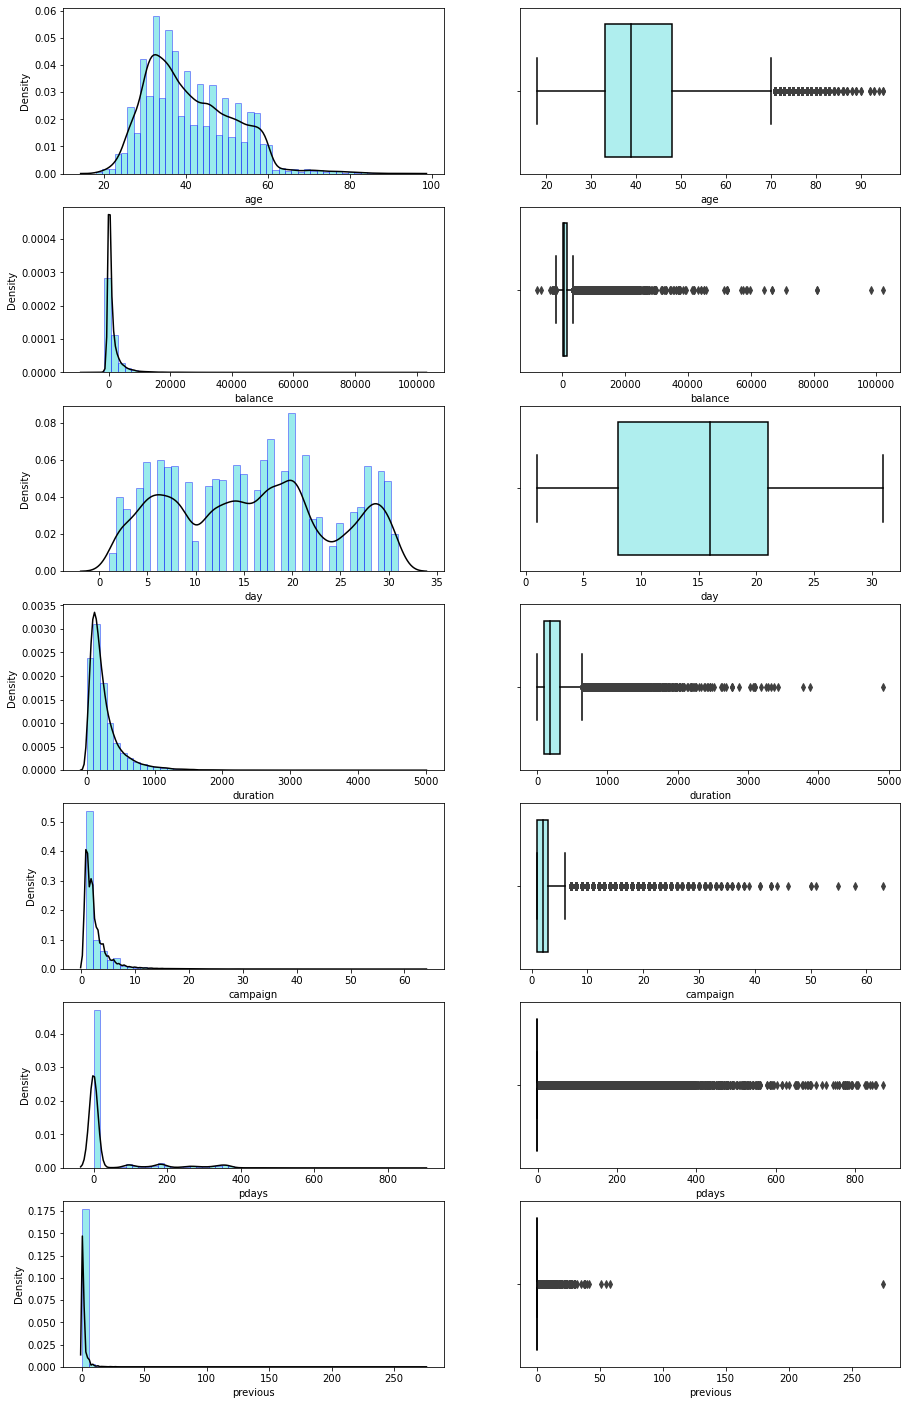

In [10]:
fig, axs = plt.subplots(nrows = 7, ncols = 2, figsize = (15, 25))

# Box plot properties
PROPS = {
    'boxprops':{'facecolor':'paleturquoise', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
# Age
sns.distplot(df['age'], hist = True, color = "darkturquoise",kde_kws={"color": "k"}, hist_kws = {'edgecolor':'blue'},ax = axs[0,0])
sns.boxplot(x= "age", data = df, ax = axs[0,1],**PROPS)
# Balance
sns.distplot(df['balance'], hist = True, color = "darkturquoise",kde_kws={"color": "k"}, hist_kws = {'edgecolor':'blue'},ax = axs[1,0])
sns.boxplot(x = "balance", data = df, ax = axs[1,1],**PROPS)
# Day
sns.distplot(df['day'], hist = True, color = "darkturquoise",kde_kws={"color": "k"}, hist_kws = {'edgecolor':'blue'},ax = axs[2,0])
sns.boxplot(x = "day", data = df, ax = axs[2,1],**PROPS)
# Duration
sns.distplot(df['duration'], hist = True, color = "darkturquoise",kde_kws={"color": "k"}, hist_kws = {'edgecolor':'blue'},ax = axs[3,0])
sns.boxplot(x = "duration", data = df, ax = axs[3,1],**PROPS)
# Campaign
sns.distplot(df['campaign'], hist = True, color = "darkturquoise",kde_kws={"color": "k"}, hist_kws = {'edgecolor':'blue'},ax = axs[4,0])
sns.boxplot(x = "campaign", data = df, ax = axs[4,1],**PROPS)
# Pdays
sns.distplot(df['pdays'], hist = True, color = "darkturquoise",kde_kws={"color": "k"}, hist_kws = {'edgecolor':'blue'},ax = axs[5,0])
sns.boxplot(x = "pdays", data = df, ax = axs[5,1],**PROPS)
# Previous
sns.distplot(df['previous'], hist = True, color = "darkturquoise",kde_kws={"color": "k"}, hist_kws = {'edgecolor':'blue'},ax = axs[6,0])
sns.boxplot(x = "previous", data = df, ax = axs[6,1],**PROPS)


# Visvalizing categorical features

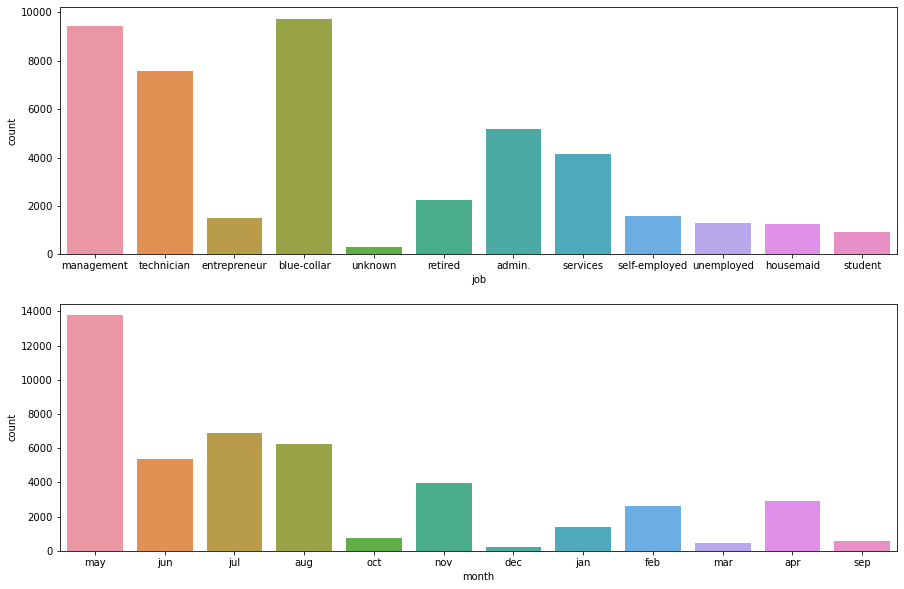

In [11]:
# Job & Month

fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 10))

# Job & Month
sns.countplot(x = "job", data = df, ax=axs[0])
sns.countplot(x = "month", data = df, ax=axs[1])

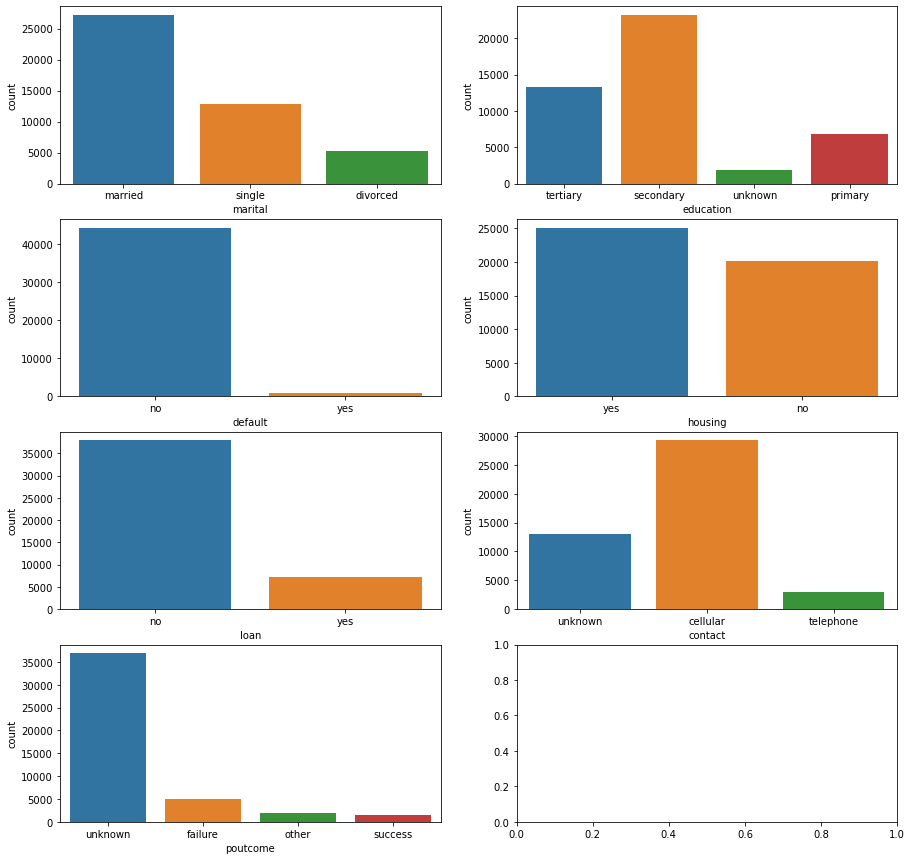

In [12]:
# Marital, education, default, housing, loan, contact, poutcome

fig, axs = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 15))

# Material and education
sns.countplot(x = "marital", data = df, ax=axs[0,0])
sns.countplot(x = "education", data = df, ax=axs[0,1])
# Default and housing
sns.countplot(x = "default", data = df, ax=axs[1,0])
sns.countplot(x = "housing", data = df, ax=axs[1,1])
# loan and contact
sns.countplot(x = "loan", data = df, ax=axs[2,0])
sns.countplot(x = "contact", data = df, ax=axs[2,1])
# poutcome
sns.countplot(x = "poutcome", data = df, ax=axs[3,0])

# Categorical features treatment

Assigns label to all categorical features

In [13]:
# Encode the data as per label (Alphabetical)
L_enc = LabelEncoder()
df['job']      = L_enc.fit_transform(df['job']) 
df['marital']  = L_enc.fit_transform(df['marital']) 
df['education']= L_enc.fit_transform(df['education']) 
df['default']  = L_enc.fit_transform(df['default']) 
df['housing']  = L_enc.fit_transform(df['housing']) 
df['contact']  = L_enc.fit_transform(df['contact'])
df['month']     = L_enc.fit_transform(df['month'])
df['day'] = L_enc.fit_transform(df['day'])
df['poutcome'] = L_enc.fit_transform(df['poutcome'])
df['loan'] = L_enc.fit_transform(df['loan'])

In [14]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,4,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,4,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,4,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,4,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,4,8,198,1,-1,0,3


# Feature selection - Correlation study

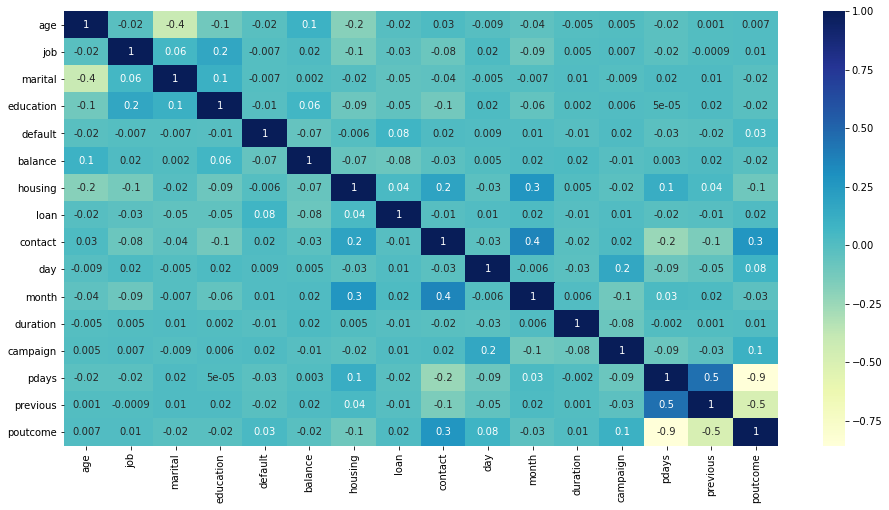

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu",fmt='.1g')

In [16]:
# Remove pdays
df = df.drop(['pdays'],axis=1)

In [17]:
YY = L_enc.fit_transform(Y)

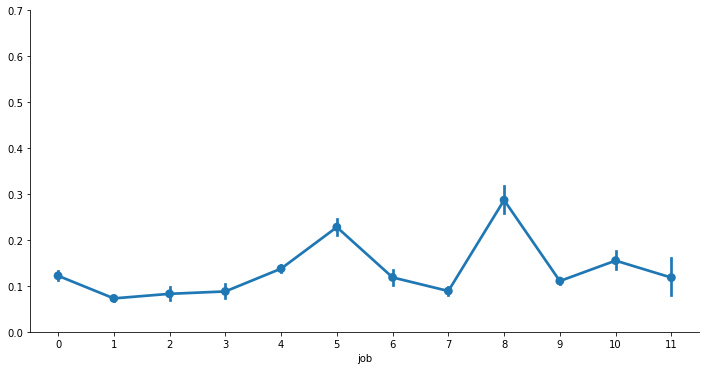

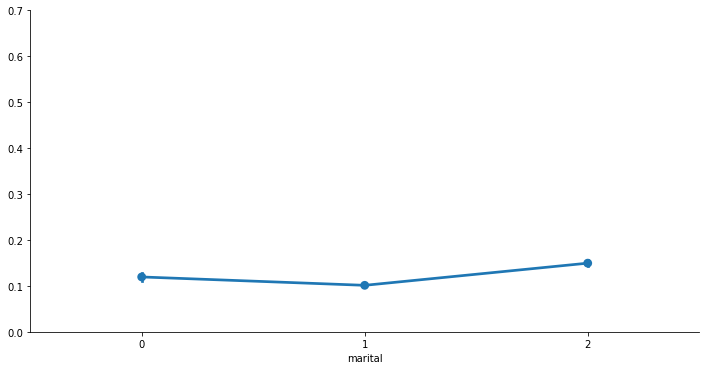

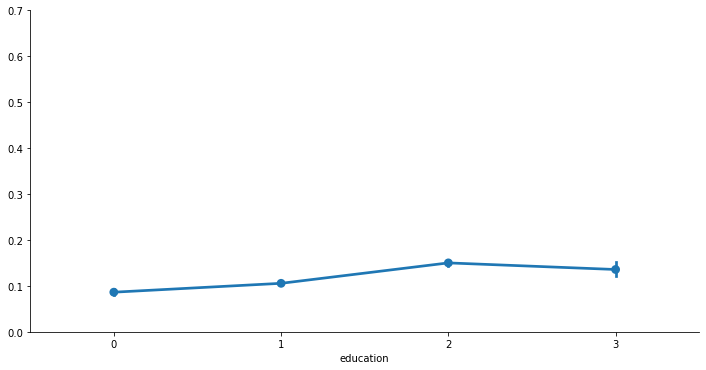

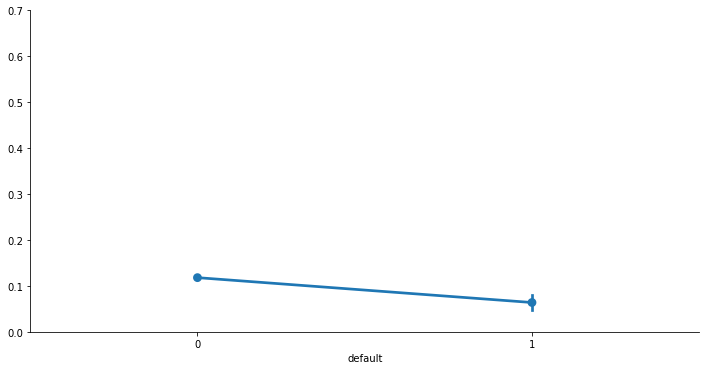

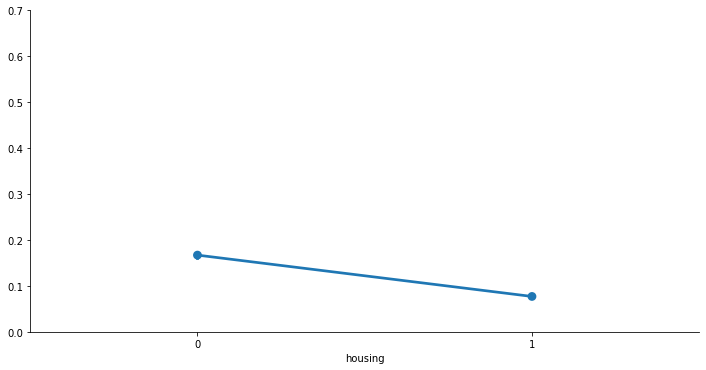

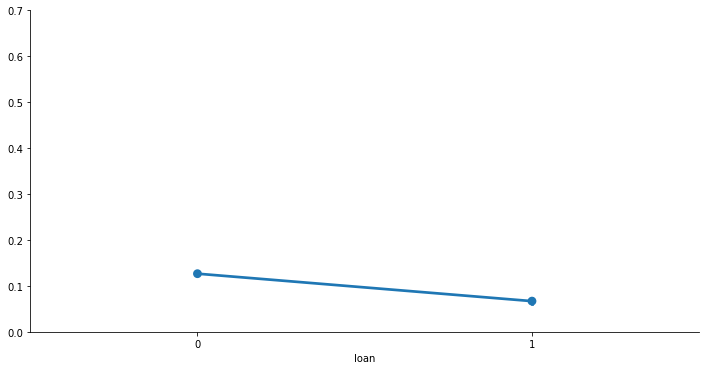

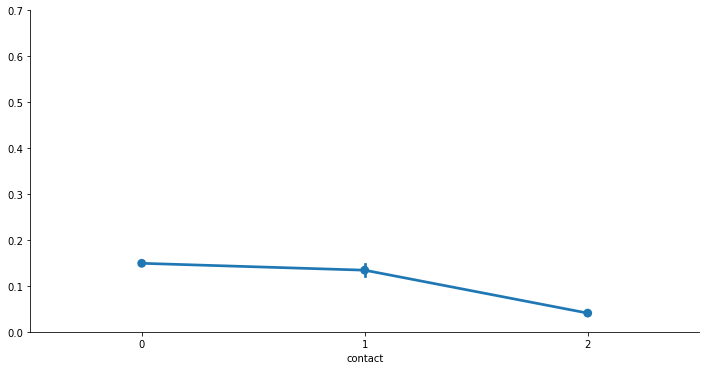

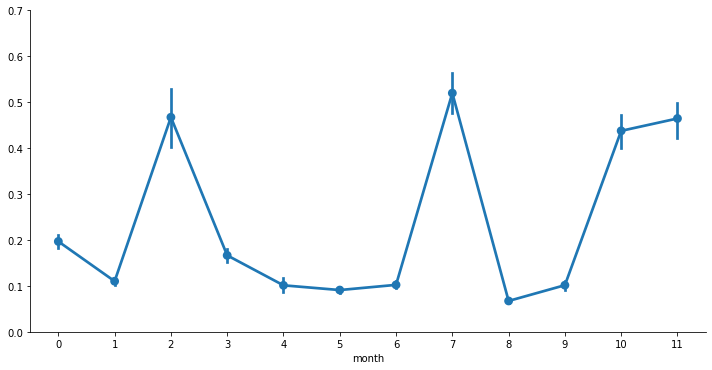

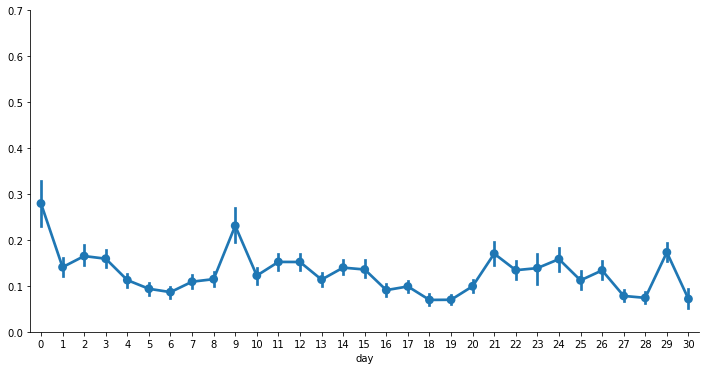

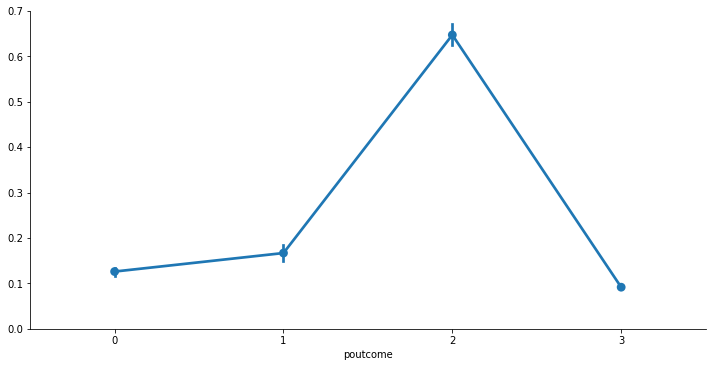

In [18]:
# Generate categorical plots for features
for col in ["job","marital","education","default","housing","loan","contact","month","day","poutcome"]:
    sns.catplot(x=col, y=YY, data=df, kind='point', aspect=2, )
    plt.ylim(0, 0.7)

# Spliting data set for training and testing

In [19]:

X_train, X_test, y_train, y_test = train_test_split(df,
                                                    YY,
                                                    test_size=.25, random_state = 42,
                                                    stratify= YY)

# Model Building

In [20]:
model_xgb_clf = xgb.XGBClassifier()
model_xgb_clf.fit(X_train, y_train)
xgb_preds_clf = model_xgb_clf.predict(X_test)
print('acc',accuracy_score(y_test,xgb_preds_clf))

acc 0.9023268158895869


# Outlier removal

In [21]:
# Remove outliers 
df_1 = df[df.previous < df.previous.quantile(.95)]
YY = YY[df.previous < df.previous.quantile(.95)]
df_2 = df_1[df_1.previous >= 0]
YY = YY[df_1.previous >= 0]


In [22]:
df_1.shape[0]

41832

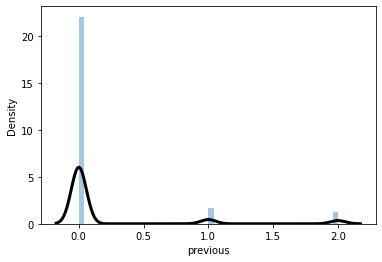

In [23]:
ax=sns.distplot(df_1['previous'], kde_kws={"color": "k", "lw": 3, "label": "KDE"})

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_2,
                                                    YY,
                                                    test_size=.25, random_state = 42,
                                                    stratify= YY)

In [25]:
model_xgb_clf = xgb.XGBClassifier()
model_xgb_clf.fit(X_train, y_train)
xgb_preds_clf = model_xgb_clf.predict(X_test)
print('acc',accuracy_score(y_test,xgb_preds_clf))

acc 0.9090648307515777
